## 1. Load the Data
We begin by loading the cleaned dataset that includes public health, corruption index, and cause-specific health metrics. This is the input for hierarchical clustering.


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import calinski_harabasz_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("../Data/filtered_dataset.csv")
df.head()


,country_code,country,year,gdp_health_expenditure,political_corruption_index,cause_id,cause_name,metric,value,upper_value,lower_value
0,ARG,Argentina,2010,5.572,0.545,491,Cardiovascular diseases,Percent,0.300254,0.312661,0.276767
1,ARG,Argentina,2010,5.572,0.545,491,Cardiovascular diseases,Rate,228.254111,237.834026,210.686157
2,ARG,Argentina,2010,5.572,0.545,626,Musculoskeletal disorders,Percent,0.002064,0.002195,0.001918
3,ARG,Argentina,2010,5.572,0.545,626,Musculoskeletal disorders,Rate,1.568882,1.667935,1.456441
4,ARG,Argentina,2010,5.572,0.545,640,Other non-communicable diseases,Percent,0.028300,0.029386,0.026785


## 2. Feature Selection and Standardization
We select relevant features for clustering:

- `value`: health metric (like percent or rate of deaths)
- `gdp_health_expenditure`: % of GDP spent on health
- `political_corruption_index`: corruption level (0 = low, 1 = high)

These are standardized using `StandardScaler` to ensure equal contribution to distance calculations.


In [3]:
# Select features for clustering
features = ['value', 'gdp_health_expenditure', 'political_corruption_index']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 3. Compute Linkage Matrix
We calculate the linkage matrix using Ward's method, which minimizes variance within clusters.


In [4]:
linked = linkage(X_scaled, method='ward')


## 4. Dendrogram
The dendrogram visualizes the hierarchical clustering. By looking at the longest vertical distance not crossed by horizontal lines, we can estimate the number of clusters.


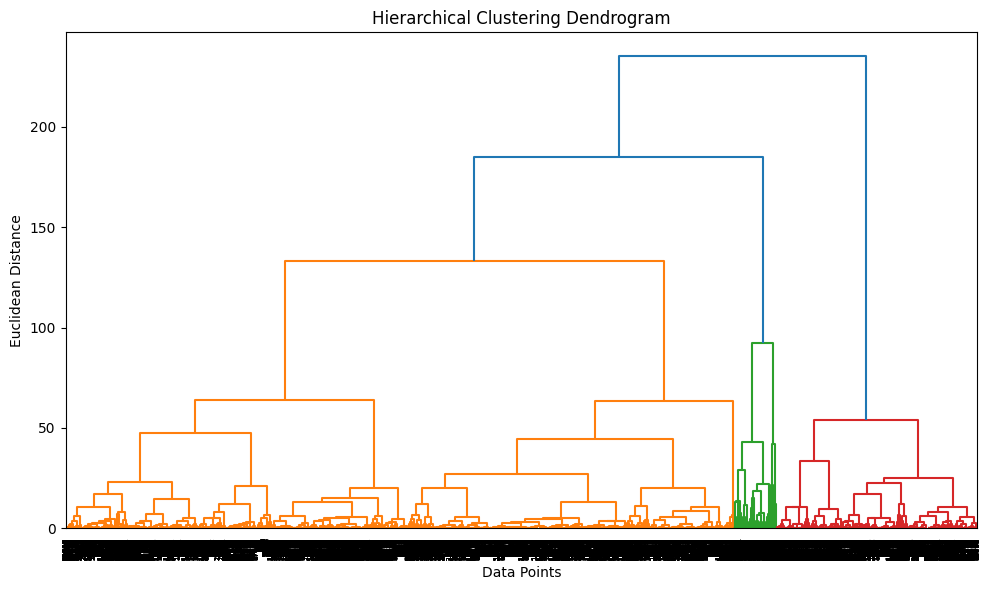

In [5]:
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()


## 5. Assign Cluster Labels
We cut the dendrogram at a chosen distance threshold to assign cluster labels.


In [6]:
max_d = 7 
df['Cluster'] = fcluster(linked, max_d, criterion='distance')
df[['Cluster'] + features].head()


,Cluster,value,gdp_health_expenditure,political_corruption_index
0,46,0.300254,5.572,0.545
1,28,228.254111,5.572,0.545
2,46,0.002064,5.572,0.545
3,46,1.568882,5.572,0.545
4,46,0.028300,5.572,0.545


## 6. Visualize Clusters
We use a 2D scatterplot to visualize the distribution of clusters with respect to the selected features.


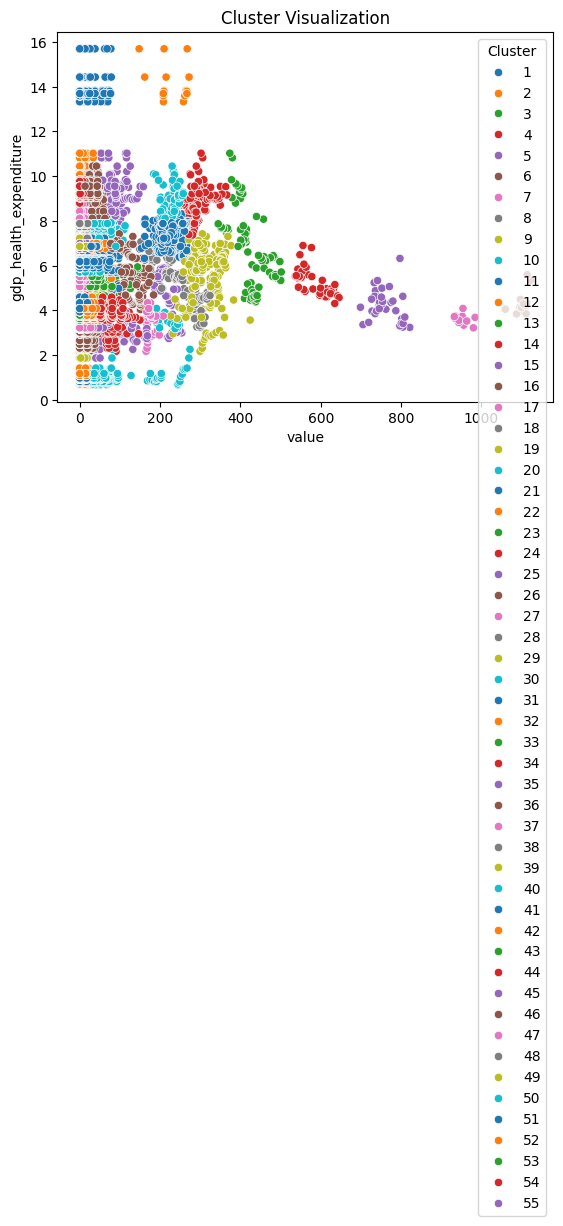

In [7]:
sns.scatterplot(
    data=df,
    x='value',
    y='gdp_health_expenditure',
    hue='Cluster',
    palette='tab10'
)
plt.title('Cluster Visualization')
plt.show()


## Conclusion

In this analysis, we performed hierarchical clustering on a dataset combining:

- `value`: cause-specific health metric (e.g., death rate or percentage)
- `gdp_health_expenditure`: public health expenditure as a share of GDP
- `political_corruption_index`: corruption score (0 = low, 1 = high)

Using Ward’s linkage method, we built a dendrogram based on Euclidean distances between data points. This allowed us to visually assess the data structure and decide a suitable threshold to extract flat clusters.

### Key Observations

- 55 clusters were identified, capturing a wide range of health, governance, and funding characteristics across countries.
- Clusters like Cluster 46 group entries with low disease burden, moderate public health spending, and uniform corruption scores, suggesting structural similarity.
- Clusters like Cluster 28 contain high outliers in `value`, possibly indicating specific countries or diseases with disproportionately high impact.

The cluster scatter plot confirmed distinct groupings, with dense low-burden zones and sparse high-burden outliers.

### Insights

- Hierarchical clustering provided interpretable and flexible grouping of multi-dimensional public health data.
- This approach can support country comparisons, policy prioritization, or anomaly detection in health economics.
- Further evaluation (e.g., silhouette analysis, PCA projections) could refine cluster reliability and dimensional clarity.
